In [2]:
import pandas as pd
import numpy as np
import gseapy as gp
from gseapy.plot import barplot, dotplot

import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [2]:
#Import libraries
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

# GBM

In [3]:
gbm_og_trans = pd.read_csv("../../EGFR/Make_Tables/csv_files/trans_effects_all_prot_fdr_corrected_GBM")
gbm_og_trans =gbm_og_trans.loc[(gbm_og_trans["P_value_GBM"] <= 0.05)]
og_gbm_genes = gbm_og_trans.Comparison.to_list()
len(og_gbm_genes)

1590

In [4]:

matching = [s for s in og_gbm_genes if "_" in s]
matching

[]

In [5]:
gbm_pancan_trans = pd.read_csv("csv_files/trans_effects_all_prot_fdr_corrected_GBM")
gbm_pancan_trans =gbm_pancan_trans.loc[(gbm_pancan_trans["P_value_GBM"] <= 0.05)]
#duplicates due to different database id were labeled with and _#. 
#Remove so it won't be counted as a different gene in VennDiagram 
gbm_pancan_trans["Comparison"] = gbm_pancan_trans['Comparison'].str.replace(r"_\d","")
pancan_gbm_genes = gbm_pancan_trans.Comparison.to_list()
len(set(pancan_gbm_genes))

1342

In [6]:
matching = [s for s in pancan_gbm_genes if "_" in s]
len(matching)

0

Text(0.5, 1.0, 'GBM')

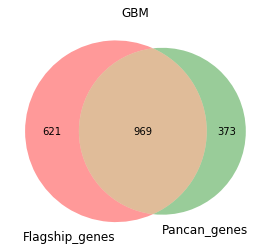

In [7]:
og_genes = set(og_gbm_genes)
pancan_genes = set(pancan_gbm_genes)
venn2([og_genes,pancan_genes],("Flagship_genes", "Pancan_genes"))
plt.title('GBM')

In [8]:
sig_both_gene = og_genes.intersection(pancan_genes)
print(len(sig_both_gene))
flagship_only = og_genes - sig_both_gene
print(len(flagship_only))
pancan_only = pancan_genes - sig_both_gene
print(len(pancan_only))

969
621
373


Histogram of pancan p-values for trans genes that are no longer significant

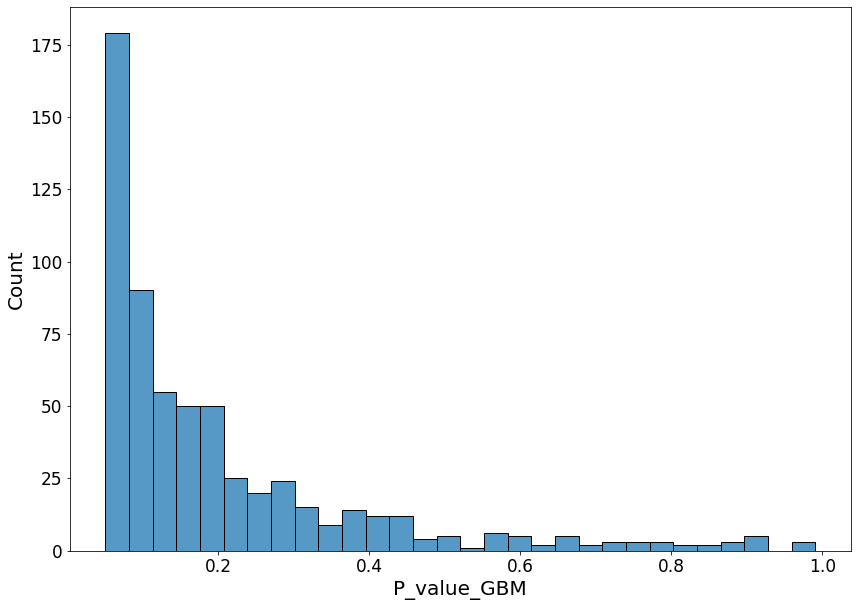

In [17]:
import seaborn as sns
gbm_pancan_trans = pd.read_csv("csv_files/trans_effects_all_prot_fdr_corrected_GBM")
gbm_pancan_trans["Comparison"] = gbm_pancan_trans['Comparison'].str.replace(r"_\d","")
gbm_pancan_no_longer_sig  = gbm_pancan_trans[gbm_pancan_trans.Comparison.isin(flagship_only)]


#gbm_pancan_no_longer_sig.P_value_GBM.hist(bins = 30)
plt.figure(figsize=(14, 10))
plt.xlabel("P_value_GBM", fontsize=20)
plt.ylabel( "Count", fontsize=20)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
sns.histplot(data=gbm_pancan_no_longer_sig, x="P_value_GBM", bins = 30)

In [ ]:
gbm_og_trans = pd.read_csv("../../EGFR/Make_Tables/csv_files/trans_effects_all_prot_fdr_corrected_GBM")
gbm_og_trans =gbm_og_trans.loc[(gbm_og_trans["P_value_GBM"] <= 0.05)]
gbm_pancan_trans = pd.read_csv("csv_files/trans_effects_all_prot_fdr_corrected_GBM")

gbm_pancan_trans = gbm_pancan_trans.rename(columns={"Correlation_GBM": "Correlation_GBM_pancan","P_value_GBM":"P_value_GBM_pancan" })
gbm_og_trans = gbm_og_trans.rename(columns={"Correlation_GBM": "Correlation_GBM_og","P_value_GBM":"P_value_GBM_og" })
gbm_pancan_trans = gbm_pancan_trans.set_index("Comparison")
gbm_og_trans = gbm_og_trans.set_index("Comparison")

#significant in flagship and all in pancan
both_gbm = gbm_pancan_trans.join(gbm_og_trans, how = "right")
both_gbm = both_gbm.dropna()
both_gbm


In [ ]:
both_gbm["Diff_pval"] = both_gbm["P_value_GBM_pancan"] - both_gbm["P_value_GBM_og"]
both_gbm.sort_values(by=['Diff_pval'], inplace=True, ascending=False)

In [ ]:
both_gbm

In [ ]:
sig_both_gene = list(sig_both_gene)

In [ ]:
same_sign_enr = gp.enrichr(gene_list = sig_both_gene, description='Tumor_partition', gene_sets='NCI-Nature_2016', 
                       outdir='test/enrichr_NCI-Nature')
same_sign_enr.res2d.head(10)

# HNSCC 

In [21]:
hnscc_og_trans = pd.read_csv("../../EGFR/Make_Tables/csv_files/trans_effects_all_prot_fdr_corrected_HNSCC")
#hnscc_og_trans["Comparison"] = hnscc_og_trans['Comparison'].str.replace(r"_\d","")
hnscc_og_trans = hnscc_og_trans.loc[(hnscc_og_trans["P_value_HNSCC"] <= 0.05)]
og_hnscc_genes = hnscc_og_trans.Comparison.to_list()
len(set(og_hnscc_genes))

1704

In [29]:
matching = [s for s in pancan_hnscc_genes if "_" in s]
len(matching)

0

In [22]:
hnscc_pancan_trans = pd.read_csv("csv_files/trans_effects_all_prot_fdr_corrected_HNSCC")
hnscc_pancan_trans =hnscc_pancan_trans.loc[(hnscc_pancan_trans["P_value_HNSCC"] <= 0.05)]
#duplicates due to different database id were labeled with and _#. 
#Remove so it won't be counted as a different gene in VennDiagram 
hnscc_pancan_trans["Comparison"] = hnscc_pancan_trans['Comparison'].str.replace(r"_\d","")
pancan_hnscc_genes = hnscc_pancan_trans.Comparison.to_list()
len(set(pancan_hnscc_genes))

1680

Text(0.5, 1.0, 'HNSCC')

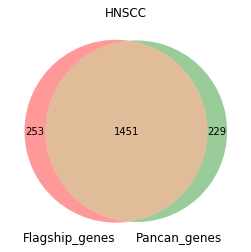

In [23]:
og_genes = set(og_hnscc_genes)
pancan_genes = set(pancan_hnscc_genes)
venn2([og_genes,pancan_genes],("Flagship_genes", "Pancan_genes"))
plt.title('HNSCC')

# LUAD

In [41]:
luad_og_trans = pd.read_csv("../../EGFR/Make_Tables/csv_files/trans_effects_all_prot_fdr_corrected_LUAD")
luad_og_trans = luad_og_trans.loc[(luad_og_trans["P_value_LUAD"] <= 0.05)]
#duplicates due to different database id were labeled with and _#. 
#Remove so it won't be counted as a different gene in VennDiagram 
luad_og_trans["Comparison"] = luad_og_trans['Comparison'].str.replace(r"_\d","")
og_luad_genes = luad_og_trans.Comparison.to_list()
len(set(og_luad_genes))

1229

In [42]:
luad_pancan_trans = pd.read_csv("csv_files/trans_effects_all_prot_fdr_corrected_LUAD")
luad_pancan_trans = luad_pancan_trans.loc[(luad_pancan_trans["P_value_LUAD"] <= 0.05)]
#duplicates due to different database id were labeled with and _#. 
#Remove so it won't be counted as a different gene in VennDiagram 
luad_pancan_trans["Comparison"] = luad_pancan_trans['Comparison'].str.replace(r"_\d","")
pancan_luad_genes = luad_pancan_trans.Comparison.to_list()
len(set(pancan_luad_genes))

968

In [44]:
matching = [s for s in og_luad_genes if "_" in s]
len(matching)

0

Text(0.5, 1.0, 'LUAD')

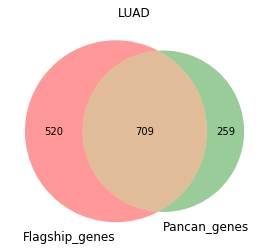

In [45]:
og_genes = set(og_luad_genes)
pancan_genes = set(pancan_luad_genes)
venn2([og_genes,pancan_genes],("Flagship_genes", "Pancan_genes"))
plt.title('LUAD')

# ccRCC

In [52]:
ccrcc_og_trans = pd.read_csv("../../EGFR/Make_Tables/csv_files/trans_effects_all_prot_fdr_corrected_ccRCC")
ccrcc_og_trans = ccrcc_og_trans.loc[(ccrcc_og_trans["P_value_ccRCC"] <= 0.05)]
#duplicates due to different database id were labeled with and _#. 
#Remove so it won't be counted as a different gene in VennDiagram 
ccrcc_og_trans["Comparison"] = ccrcc_og_trans['Comparison'].str.replace(r"_\d","")
og_ccrcc_genes = ccrcc_og_trans.Comparison.to_list()
len(set(og_ccrcc_genes))

1087

In [53]:
ccrcc_pancan_trans = pd.read_csv("csv_files/trans_effects_all_prot_fdr_corrected_ccRCC")
ccrcc_pancan_trans = ccrcc_pancan_trans.loc[(ccrcc_pancan_trans["P_value_ccRCC"] <= 0.05)]
#duplicates due to different database id were labeled with and _#. 
#Remove so it won't be counted as a different gene in VennDiagram 
ccrcc_pancan_trans["Comparison"] = ccrcc_pancan_trans['Comparison'].str.replace(r"_\d","")
pancan_ccrcc_genes = ccrcc_pancan_trans.Comparison.to_list()
len(set(pancan_ccrcc_genes))


848

In [54]:
matching = [s for s in og_ccrcc_genes if "_" in s]
len(matching)

0

Text(0.5, 1.0, 'ccRCC')

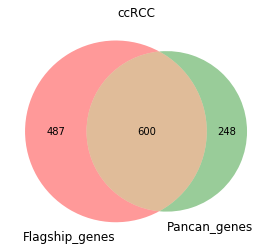

In [55]:
og_genes = set(og_ccrcc_genes)
pancan_genes = set(pancan_ccrcc_genes)
venn2([og_genes,pancan_genes],("Flagship_genes", "Pancan_genes"))
plt.title('ccRCC')

# LSCC

In [67]:
lscc_og_trans = pd.read_csv("../../EGFR/Make_Tables/csv_files/trans_effects_all_prot_fdr_corrected_LSCC")
lscc_og_trans = lscc_og_trans.loc[(lscc_og_trans["P_value_LSCC"] <= 0.05)]
#duplicates due to different database id were labeled with and _#. 
#Remove so it won't be counted as a different gene in VennDiagram 
lscc_og_trans["Comparison"] = lscc_og_trans['Comparison'].str.replace(r"_\d","")
og_lscc_genes = lscc_og_trans.Comparison.to_list()
len(set(og_lscc_genes))

500

In [68]:
matching = [s for s in og_lscc_genes if "_" in s]
matching

[]

In [61]:
lscc_pancan_trans = pd.read_csv("csv_files/trans_effects_all_prot_fdr_corrected_LSCC")
lscc_pancan_trans = lscc_pancan_trans.loc[(lscc_pancan_trans["P_value_LSCC"] <= 0.05)]
pancan_lscc_genes = lscc_pancan_trans.Comparison.to_list()
len(set(pancan_luad_genes))


968

Text(0.5, 1.0, 'LSCC')

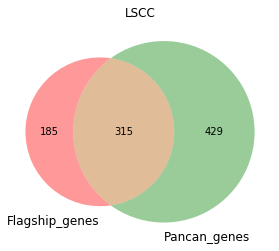

In [69]:
og_genes = set(og_lscc_genes)
pancan_genes = set(pancan_lscc_genes)
venn2([og_genes,pancan_genes],("Flagship_genes", "Pancan_genes"))
plt.title('LSCC')